In [65]:
# BLOCK 1: IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

print("Libraries imported!")

Libraries imported!


In [66]:
# BLOCK 2: LOAD AND EXPLORE DATA
df = pd.read_csv('diabetes.csv')
print(f"Data loaded: {df.shape}")
print("\nFirst 3 rows:")
print(df.head(3))

Data loaded: (768, 9)

First 3 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469   

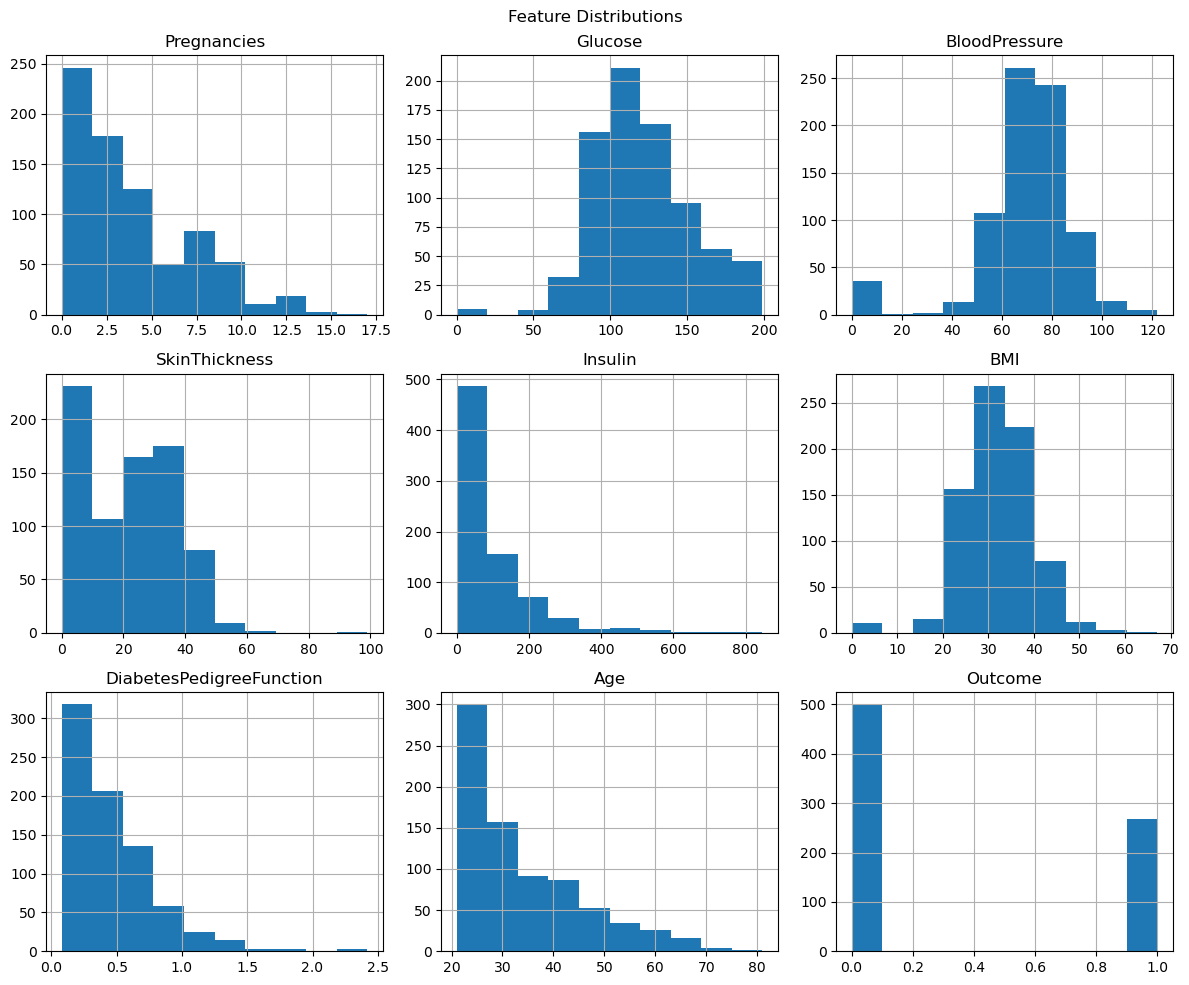

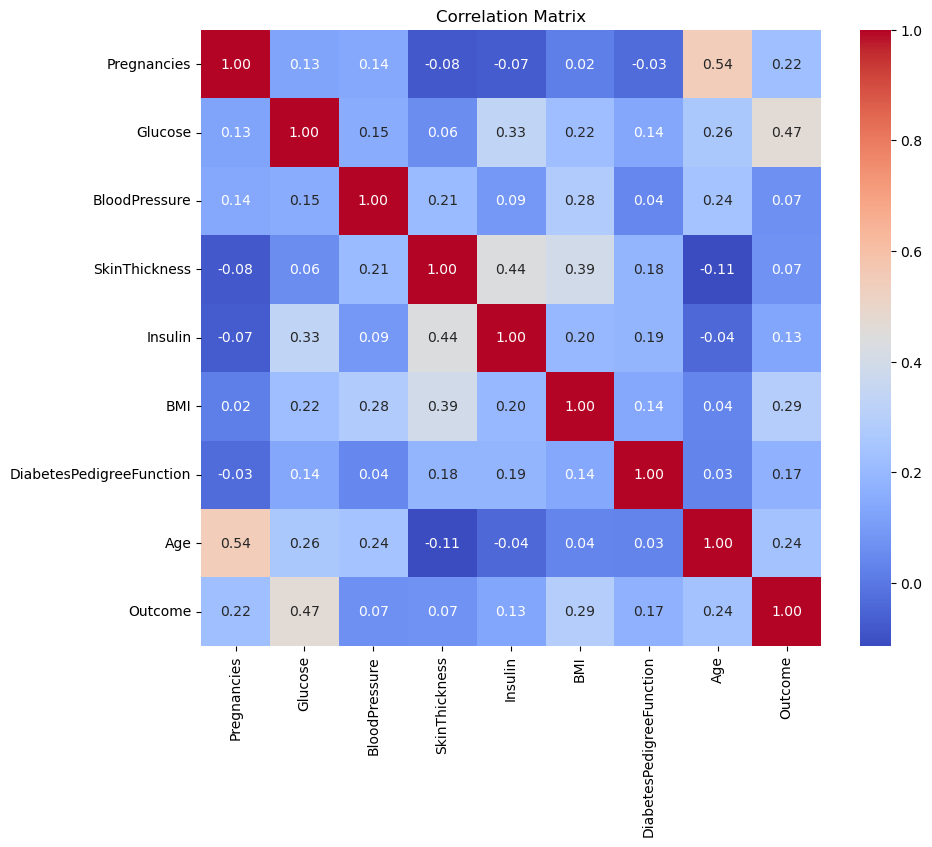

In [67]:
# BLOCK 3: EDA
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

df.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [68]:
# BLOCK 4: PREPROCESSING
medical_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in medical_cols:
    df[col] = df[col].replace(0, df[col].mean())

X = df.drop('Outcome', axis=1)
y = df['Outcome']
print("Data preprocessing completed!")

Data preprocessing completed!


In [69]:
# BLOCK 5: TRAIN MODEL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)
print("Model trained successfully!")

Model trained successfully!


=== MODEL PERFORMANCE ===
Accuracy:  0.7662
Precision: 0.6863
Recall:    0.6364
F1-Score:  0.6604
ROC-AUC:   0.8220


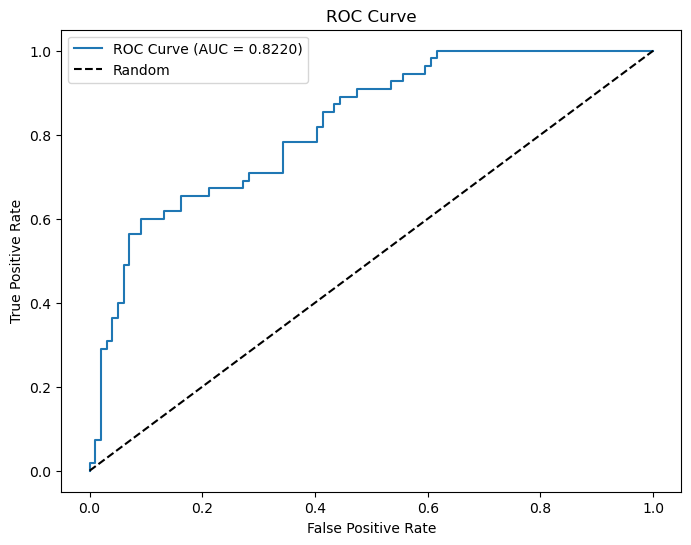

In [71]:
# BLOCK 6: EVALUATION
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("=== MODEL PERFORMANCE ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [72]:
# BLOCK 7: INTERPRETATION
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("Feature Coefficients:")
print(coefficients)

print("\nKey Findings:")
for _, row in coefficients.head(3).iterrows():
    effect = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"- {row['Feature']}: {effect} diabetes risk")

Feature Coefficients:
                    Feature  Coefficient
1                   Glucose     1.125242
5                       BMI     0.731232
7                       Age     0.392883
0               Pregnancies     0.222121
6  DiabetesPedigreeFunction     0.211802
4                   Insulin    -0.185871
2             BloodPressure    -0.168075
3             SkinThickness     0.016782

Key Findings:
- Glucose: increases diabetes risk
- BMI: increases diabetes risk
- Age: increases diabetes risk


In [73]:
# BLOCK 8: CREATE STREAMLIT APP WITH BUILT-IN MODEL
app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle

# Page config
st.set_page_config(page_title="Diabetes Prediction", layout="centered")

st.title("Diabetes Risk Prediction")
st.write("Enter patient clinical information:")

# Input fields
col1, col2 = st.columns(2)

with col1:
    pregnancies = st.number_input("Pregnancies", 0, 20, 1)
    glucose = st.number_input("Glucose Level", 50, 200, 120)
    blood_pressure = st.number_input("Blood Pressure", 40, 130, 70)
    skin_thickness = st.number_input("Skin Thickness", 10, 100, 20)

with col2:
    insulin = st.number_input("Insulin Level", 0, 900, 80)
    bmi = st.number_input("BMI", 15.0, 60.0, 25.0)
    diabetes_pedigree = st.number_input("Diabetes Pedigree", 0.0, 2.5, 0.5)
    age = st.number_input("Age", 20, 100, 25)

if st.button("Predict Diabetes Risk"):
    try:
        # Load the diabetes dataset and train model directly in Streamlit
        # This avoids pickle compatibility issues
        import pandas as pd
        from sklearn.linear_model import LogisticRegression
        from sklearn.preprocessing import StandardScaler
        
        # Load data
        df = pd.read_csv('diabetes.csv')
        
        # Preprocess
        medical_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
        for col in medical_cols:
            df[col] = df[col].replace(0, df[col].mean())
        
        X = df.drop('Outcome', axis=1)
        y = df['Outcome']
        
        # Train model
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        model = LogisticRegression(random_state=42, max_iter=1000)
        model.fit(X_scaled, y)
        
        # Prepare input
        input_data = pd.DataFrame({
            'Pregnancies': [pregnancies],
            'Glucose': [glucose],
            'BloodPressure': [blood_pressure],
            'SkinThickness': [skin_thickness],
            'Insulin': [insulin],
            'BMI': [bmi],
            'DiabetesPedigreeFunction': [diabetes_pedigree],
            'Age': [age]
        })
        
        # Predict
        scaled_data = scaler.transform(input_data)
        prediction = model.predict(scaled_data)[0]
        probability = model.predict_proba(scaled_data)[0, 1]
        
        # Show results
        st.subheader("Prediction Result")
        if prediction == 1:
            st.error("HIGH RISK OF DIABETES")
            st.write(f"Probability: {probability:.1%}")
        else:
            st.success("LOW RISK OF DIABETES")
            st.write(f"Probability: {probability:.1%}")
        
        st.progress(float(probability))
        
    except Exception as e:
        st.error(f"Please make sure diabetes.csv is in the same folder. Error: {str(e)}")

st.sidebar.info("For educational purposes only")
'''

with open('app.py', 'w') as f:
    f.write(app_code)

print("✅ Streamlit app created as 'app.py'")
print("✅ The app will train the model directly - no pickle files needed!")
print("✅ Just run: streamlit run app.py")

✅ Streamlit app created as 'app.py'
✅ The app will train the model directly - no pickle files needed!
✅ Just run: streamlit run app.py


In [62]:
# Save model
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save scaler  
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Model files saved!")
print("✅ diabetes_model.pkl")
print("✅ scaler.pkl")

# Verify files exist
print("\nChecking if files exist:")
print(f"diabetes_model.pkl exists: {os.path.exists('diabetes_model.pkl')}")
print(f"scaler.pkl exists: {os.path.exists('scaler.pkl')}")

✅ Model files saved!
✅ diabetes_model.pkl
✅ scaler.pkl

Checking if files exist:
diabetes_model.pkl exists: True
scaler.pkl exists: True


In [63]:
# BLOCK 10: TEST MODEL LOADING
print("=== TESTING MODEL LOADING ===")
try:
    with open('diabetes_model.pkl', 'rb') as f:
        test_model = pickle.load(f)
    print("✅ Model loads successfully")
    
    with open('scaler.pkl', 'rb') as f:
        test_scaler = pickle.load(f)
    print("✅ Scaler loads successfully")
    
    # Test prediction
    test_input = pd.DataFrame({
        'Pregnancies': [2],
        'Glucose': [120], 
        'BloodPressure': [70],
        'SkinThickness': [25],
        'Insulin': [80],
        'BMI': [26.5],
        'DiabetesPedigreeFunction': [0.5],
        'Age': [30]
    })
    
    test_scaled = test_scaler.transform(test_input)
    test_pred = test_model.predict(test_scaled)
    test_prob = test_model.predict_proba(test_scaled)[0, 1]
    
    print(f"✅ Test prediction works: {test_pred[0]}, Probability: {test_prob:.3f}")
    
except Exception as e:
    print(f"❌ Error: {e}")

=== TESTING MODEL LOADING ===
✅ Model loads successfully
✅ Scaler loads successfully
✅ Test prediction works: 0, Probability: 0.163


In [64]:
# BLOCK 11: CREATE STREAMLIT APP
app_code = '''
import streamlit as st
import pandas as pd
import pickle

st.set_page_config(page_title="Diabetes Prediction", layout="centered")

st.title("Diabetes Risk Prediction")
st.write("Enter patient clinical information below:")

col1, col2 = st.columns(2)

with col1:
    pregnancies = st.number_input("Pregnancies", 0, 20, 1)
    glucose = st.number_input("Glucose Level", 50, 200, 120)
    blood_pressure = st.number_input("Blood Pressure", 40, 130, 70)
    skin_thickness = st.number_input("Skin Thickness", 10, 100, 20)

with col2:
    insulin = st.number_input("Insulin Level", 0, 900, 80)
    bmi = st.number_input("BMI", 15.0, 60.0, 25.0)
    diabetes_pedigree = st.number_input("Diabetes Pedigree", 0.0, 2.5, 0.5)
    age = st.number_input("Age", 20, 100, 25)

if st.button("Predict Diabetes Risk"):
    try:
        # Load model
        with open('diabetes_model.pkl', 'rb') as f:
            model = pickle.load(f)
        # Load scaler
        with open('scaler.pkl', 'rb') as f:
            scaler = pickle.load(f)
        
        # Create input data
        input_data = pd.DataFrame({
            'Pregnancies': [pregnancies],
            'Glucose': [glucose],
            'BloodPressure': [blood_pressure],
            'SkinThickness': [skin_thickness],
            'Insulin': [insulin],
            'BMI': [bmi],
            'DiabetesPedigreeFunction': [diabetes_pedigree],
            'Age': [age]
        })
        
        # Scale and predict
        scaled_data = scaler.transform(input_data)
        prediction = model.predict(scaled_data)[0]
        probability = model.predict_proba(scaled_data)[0, 1]
        
        # Show results
        st.subheader("Prediction Result")
        if prediction == 1:
            st.error("HIGH RISK OF DIABETES")
            st.write(f"Probability: {probability:.1%}")
        else:
            st.success("LOW RISK OF DIABETES") 
            st.write(f"Probability: {probability:.1%}")
        
        # Progress bar
        st.progress(float(probability))
        
    except Exception as e:
        st.error(f"Error: {str(e)}")

st.sidebar.info("For educational purposes only")
'''

with open('app.py', 'w') as f:
    f.write(app_code)

print("✅ Streamlit app created as 'app.py'")

✅ Streamlit app created as 'app.py'


**Precision** measures how many of the predicted positive cases are actually positive. It answers: "When the model says 'yes', how often is it correct?"

**Recall** measures how many of the actual positive cases are correctly identified. It answers: "Of all the actual 'yes' cases, how many did the model find?"

**Key Difference:**
- **Precision** focuses on **false positives** (minimizing incorrect positive predictions)
- **Recall** focuses on **false negatives** (minimizing missed positive cases)

**Formula:**
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)

Where:
- TP = True Positives
- FP = False Positives  
- FN = False Negatives

**Cross-validation** is a resampling technique that splits the dataset into multiple folds, using different subsets for training and testing in each iteration.

**Common types:**
- **k-fold CV**: Data divided into k equal folds, each fold used as test set once
- **Stratified k-fold**: Maintains class distribution in each fold (important for binary classification)

**Why important in binary classification:**
1. **Reduces overfitting** - Tests model on multiple data subsets
2. **Better performance estimate** - More reliable than single train-test split
3. **Handles class imbalance** - Stratified CV ensures both classes represented in each fold
4. **Optimal hyperparameter tuning** - More robust model selection
5. **Maximizes data usage** - All data points used for both training and testing

**Process:**
- Split data into k folds
- Train on k-1 folds, test on remaining fold
- Repeat k times, rotating test fold
- Average results across all iterations